In [1]:
from plot_data_utilities import plot_config_map, plot_visits_map
import json

In [2]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np
from matplotlib.lines import Line2D
import ast


{'0': '\n                #.#\n                #.#\n                #.#\n                ...\n                #.#\n                #.#\n                #.#'}
[(1, 3), (1, 3), (1, 3), (1, 2), (1, 2), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 2), (1, 2)]


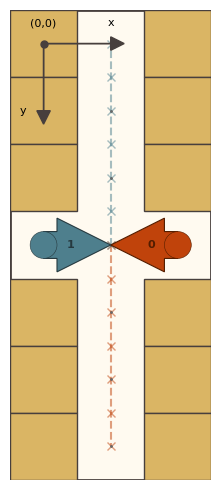

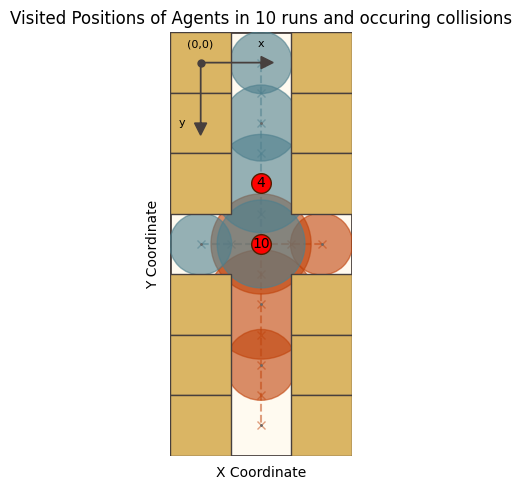

In [3]:
import os
### FOLLOWING UNIFORM SAMPLING

# Configuration
curr_dir = os.getcwd()
exp_name = os.path.basename(curr_dir)

curr_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(curr_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(data_dir, os.pardir))


for folder in os.listdir(curr_dir):
    if not os.path.isdir(os.path.join(curr_dir, folder)):
        continue
    if folder == "__pycache__":
        continue
    curr_folder = os.path.join(curr_dir, folder)
    
    input_dir_raw = os.path.join(main_dir, "data_raw", exp_name, folder)
    

    result_dir = os.path.join(main_dir, "results/", exp_name, folder)

    if not os.path.exists(result_dir):
        os.makedirs(result_dir)

    # Load the JSON file
    with open(os.path.join(input_dir_raw, "0", "conf_dict.json")) as f:
        conf_dict = json.load(f)
    env_conf = conf_dict['env_conf']
    agent_conf = conf_dict['agent_conf_0']

    # Merge the dictionaries
    combined_conf_dict = {**env_conf, **agent_conf}
    print(combined_conf_dict["env_def"])




    # plot map with zero length
    fig, ax = plt.subplots(figsize=(10, 5))
    try:
        plot_config_map(ax, combined_conf_dict, env_timestep=4, game_length=0)
    except:
        plot_config_map(ax, combined_conf_dict, env_timestep=0, game_length=0)
    plt.tight_layout()
    plt.savefig(result_dir+"/"+str(folder)+"_env_config.svg", format="svg", bbox_inches='tight')
    plt.savefig(result_dir+"/"+str(folder)+"_env_config.png", dpi=200)

    # plot visit numbers
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_visits_map(ax, combined_conf_dict, os.path.join(curr_folder, "result_data.csv"), env_timestep=0)
    plt.tight_layout()
    plt.savefig(result_dir+"/"+str(folder)+"_visits.svg", format="svg", bbox_inches='tight')
    plt.savefig(result_dir+"/"+str(folder)+"_visits.png", dpi=200)